# Library installation

In [11]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import time
import pickle
from sklearn.metrics import accuracy_score


# Load the data


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
sys.path.insert(0,'/content/drive/MyDrive/projet_EMG')

  Load the 3 split datasets

In [28]:
X_test = np.loadtxt('/content/drive/MyDrive/projet_EMG/split_datasets/test/X_test.csv', delimiter=',')
y_test = np.loadtxt('/content/drive/MyDrive/projet_EMG/split_datasets/test/y_test.csv', delimiter=',')


Check shapes, types and nan values:

In [29]:
print('X_test type  :', type(X_test), 'of shape:', X_test.shape, '| NaN values:', np.isnan(X_test.any()), "| finite values:", np.isfinite(X_test.all()), "| data type:", X_test.dtype)
print('y_test type  :', type(y_test), 'of shape:', y_test.shape, ' NaN values:', np.isnan(y_test.any()), "| finite values:", np.isfinite(y_test.all()), "|data type:", y_test.dtype)

X_test type  : <class 'numpy.ndarray'> of shape: (2060, 950) | NaN values: False | finite values: True | data type: float64
y_test type  : <class 'numpy.ndarray'> of shape: (2060,)  NaN values: False | finite values: True |data type: float64


# Model predictions

Paths of trained models

In [16]:
tuned_svm_path = "/content/drive/MyDrive/projet_EMG/trained_models/tuned_svm.pickle"
tuned_rnd_forest_path = "/content/drive/MyDrive/projet_EMG/trained_models/tuned_rnd_forest.pickle"
cbc_path = "/content/drive/MyDrive/projet_EMG/trained_models/cbc.pickle"
xgb_path = "/content/drive/MyDrive/projet_EMG/trained_models/xgb.pickle"
tuned_mlp_path = "/content/drive/MyDrive/projet_EMG/trained_models/tuned_mlp.pickle"

##SVM

Load the trained model and test on untouched data :


In [30]:
tuned_svm_model = pickle.load(open(tuned_svm_path, "rb"))
#test:
test_pred = tuned_svm_model.predict(X_test)
acc = accuracy_score(y_test, test_pred)
print('Test Accuracy:',acc*100,"%")  

Test Accuracy: 53.25242718446602 %


### Manual testing on 1 sample

In [44]:
test_sample_index = 1078
test_sample =  X_test[test_sample_index, :].reshape((1, 950))
# load classifier
tuned_svm_model = pickle.load(open(tuned_svm_path, "rb"))

#test:
prediction = tuned_svm_model.predict(test_sample)
acc = accuracy_score(y_test, test_pred)
print(f'Prediction class = {prediction[0]}, real class = {int(y_test[test_sample_index])}')


Prediction class = 13, real class = 19


## Random Forest

Load the trained model and test on untouched data :


In [31]:
tuned_rnd_forest_model = pickle.load(open(tuned_rnd_forest_path, "rb"))
#test:
test_pred = tuned_rnd_forest_model.predict(X_test)
acc = accuracy_score(y_test, test_pred)
print('Test Accuracy:',acc*100,"%")  

Test Accuracy: 49.75728155339806 %


### Manual testing on 1 sample

In [43]:
test_sample_index = 30
test_sample =  X_test[test_sample_index, :].reshape((1, 950))
# load xgb classifier
tuned_rnd_forest_model = pickle.load(open(tuned_rnd_forest_path, "rb"))

#test:
prediction = tuned_rnd_forest_model.predict(test_sample)
acc = accuracy_score(y_test, test_pred)
print(f'Prediction class = {prediction[0]}, real class = {int(y_test[test_sample_index])}')


Prediction class = 4, real class = 8


## CatBoost Classifier

In [32]:
!pip install catboost 
import catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Load the trained model and test on untouched data :


In [33]:
cbc_model = pickle.load(open(cbc_path, "rb"))
#test:
test_pred = cbc_model.predict(X_test)
acc = accuracy_score(y_test, test_pred)
print('Test Accuracy:',acc*100,"%")   

Test Accuracy: 60.43689320388349 %


### Manual testing on 1 sample

In [41]:
test_sample_index = 90
test_sample =  X_test[test_sample_index, :].reshape((1, 950))
# load xgb classifier
cbc_model = pickle.load(open(cbc_path, "rb"))

#test:
prediction = cbc_model.predict(test_sample)
acc = accuracy_score(y_test, test_pred)
print(f'Prediction class = {prediction[0]}, real class = {int(y_test[test_sample_index])}')


Prediction class = [25], real class = 25


## XGB Classifier

Load the trained model and test on untouched data :


In [34]:
from xgboost import XGBClassifier 

test the xgb model on untouched data

In [35]:
xgb_model = pickle.load(open(xgb_path, "rb"))
#test:
test_pred = xgb_model.predict(X_test)
acc = accuracy_score(y_test, test_pred)
print('Test Accuracy:',acc*100,"%")  

Test Accuracy: 91.79611650485437 %


### Manual testing on 1 sample

size of the test dataset : 

In [36]:
print('Sample number in the test dataset = ',y_test.shape[0])

Sample number in the test dataset =  2060


Choose one sample:

In [47]:
test_sample_index = 1000
test_sample =  X_test[test_sample_index, :].reshape((1, 950))
# load xgb classifier
xgb_model = pickle.load(open(xgb_path, "rb"))

#test:
prediction = xgb_model.predict(test_sample)
acc = accuracy_score(y_test, test_pred)
print(f'Prediction class = {prediction[0]}, real class = {int(y_test[test_sample_index])}')


Prediction class = 18, real class = 18


## MLP

In [38]:
from sklearn.neural_network import MLPClassifier

Load the trained model and test on untouched data :


test on untouched data

In [39]:
tuned_mlp_model = pickle.load(open(tuned_mlp_path, "rb"))
#test:
test_pred = tuned_mlp_model.predict(X_test)
acc = accuracy_score(y_test, test_pred)
print('Test Accuracy:',acc*100,"%")  

Test Accuracy: 20.87378640776699 %


### Manual testing on 1 sample

In [ ]:
test_sample_index = 901
test_sample =  X_test[test_sample_index, :].reshape((1, 950))
# load  classifier
tuned_mlp_model = pickle.load(open(tuned_mlp_path, "rb"))

#test:
prediction = tuned_mlp_model.predict(test_sample)
acc = accuracy_score(y_test, test_pred)
print(f'Prediction class = {prediction[0]}, real class = {int(y_test[test_sample_index])}')


# Result analysis

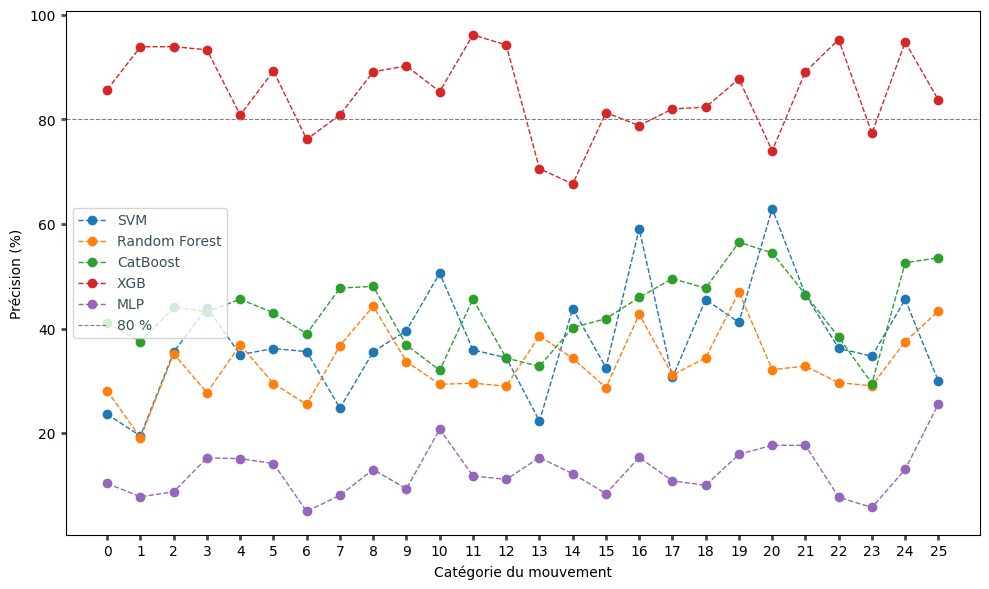

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Define the predicted outputs for each classifier
tuned_svm_path = "/content/drive/MyDrive/projet_EMG/trained_models/tuned_svm.pickle"
tuned_rnd_forest_path = "/content/drive/MyDrive/projet_EMG/trained_models/tuned_rnd_forest.pickle"
cbc_path = "/content/drive/MyDrive/projet_EMG/trained_models/cbc.pickle"
xgb_path = "/content/drive/MyDrive/projet_EMG/trained_models/xgb.pickle"
tuned_mlp_path = "/content/drive/MyDrive/projet_EMG/trained_models/tuned_mlp.pickle"


tuned_svm_model = pickle.load(open(tuned_svm_path, "rb"))
tuned_rnd_forest_model = pickle.load(open(tuned_rnd_forest_path, "rb"))
cbc_model = pickle.load(open(cbc_path, "rb"))    
xgb_model = pickle.load(open(xgb_path, "rb"))    
tuned_mlp_model = pickle.load(open(tuned_mlp_path, "rb"))


svm_preds = tuned_svm_model.predict(X_test)
rnd_forest_preds = tuned_rnd_forest_model.predict(X_test)
cbc_preds = cbc_model.predict(X_test).ravel()
xgb_preds = xgb_model.predict(X_test)
mlp_preds = tuned_mlp_model.predict(X_test)



def compute_accuracy_per_category(y_preds, y_test):
  cm = confusion_matrix(y_test, y_preds)
  nb_classes = cm.shape[0]
  accuracy = np.zeros(nb_classes)
  for i in range(nb_classes):
      TP_i = cm[i, i]
      FP_i = np.sum(cm[:, i]) - TP_i
      FN_i = np.sum(cm[i, :]) - TP_i
      accuracy[i] = 100* TP_i / (TP_i + FP_i + FN_i)
  return accuracy

categories = np.linspace(0, 25, 26, endpoint=True, dtype=int)

svm_acc = compute_accuracy_per_category(svm_preds, y_test)
rnd_forest_acc = compute_accuracy_per_category(rnd_forest_preds, y_test)
cbc_acc = compute_accuracy_per_category(cbc_preds, y_test)
xgb_acc = compute_accuracy_per_category(xgb_preds, y_test)
mlp_acc = compute_accuracy_per_category(mlp_preds, y_test)

# Plot the accuracies for every class for each classifier
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(categories, svm_acc, linestyle='--', linewidth=1, marker='o', label='SVM')
ax.plot(categories, rnd_forest_acc, linestyle='--', linewidth=1, marker='o', label='Random Forest')
ax.plot(categories, cbc_acc, linestyle='--', linewidth=1, marker='o', label='CatBoost')
ax.plot(categories, xgb_acc, linestyle='--', linewidth=1, marker='o', label='XGB')
ax.plot(categories, mlp_acc, linestyle='--', linewidth=1, marker='o', label='MLP')

ax.axhline(y=80, linestyle='--',linewidth=0.8, color='gray', label='80 %')

ax.tick_params(axis='both', which='both', color='#36525C', width=2)

ax.set_xticks(categories)
ax.set_xticklabels(categories)
ax.set_xlabel('Catégorie du mouvement')
ax.set_ylabel('Précision (%)')

legend = ax.legend(loc='center left')
for text in legend.get_texts():
    text.set_color('#36525C')

plt.tight_layout()

fig = plt.gcf()
plt.savefig('/content/drive/MyDrive/projet_EMG/graph.svg', format='svg', transparent=True)
